In [2]:
import nltk

In [3]:
#nltk.download_shell()

In [4]:
from nltk.corpus import stopwords

In [5]:
messages=[line.rstrip() for line in open("SMSSpamCollection")]

In [6]:
print(len(messages))

5574


In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [80]:
import pandas as pd

In [81]:
messages=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])#sep=delimiter

In [82]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
messages.shape

(5572, 2)

In [84]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [85]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [86]:
messages['length']=messages['message'].apply(len)

In [87]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
%matplotlib inline

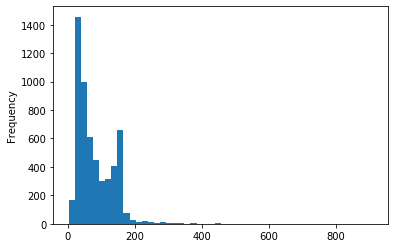

In [90]:
messages["length"].plot.hist(bins=50)

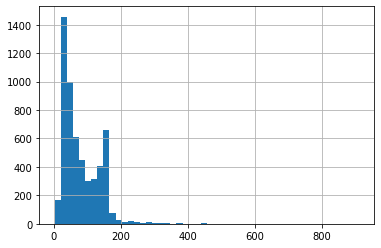

In [91]:
messages["length"].hist(bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002510249DD30>,
      dtype=object)

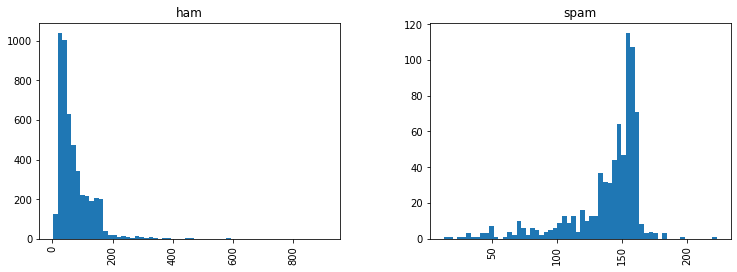

In [92]:
messages.hist(column="length",by="label",bins=60,figsize=(12,4))

In [93]:
import string

In [94]:
mess="sample message!hi :everyone"

In [95]:
nopunc=[a for a in mess if a not in string.punctuation]

In [96]:
nopunc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 'h',
 'i',
 ' ',
 'e',
 'v',
 'e',
 'r',
 'y',
 'o',
 'n',
 'e']

In [97]:
from nltk.corpus import stopwords

In [98]:
nopunc="".join(nopunc)

In [99]:
nopunc

'sample messagehi everyone'

In [100]:
nopunc.split()

['sample', 'messagehi', 'everyone']

In [101]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [102]:
clean_mess

['sample', 'messagehi', 'everyone']

In [103]:
def text_process(mess):
    """
    1.remove punc
    2.remove stop words
    3.return list of clean text words
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [104]:
word="gdasyd udhuW23JH U833N # FH$ jhdf    djhf-8nfdjh"
print(word)

word.lower()

gdasyd udhuW23JH U833N # FH$ jhdf    djhf-8nfdjh


'gdasyd udhuw23jh u833n # fh$ jhdf    djhf-8nfdjh'

In [105]:
messages.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [108]:
message=messages['message'].head(5).apply(text_process)
message

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [145]:
print(len(bow_transformer.vocabulary_))

11425


In [112]:
mess4=messages['message'][3]

In [113]:
print(mess4)

U dun say so early hor... U c already then say...


In [114]:
bow4=bow_transformer.transform([mess4]) 

In [115]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [116]:
bow4.shape

(1, 11425)

In [117]:
bow_transformer.get_feature_names()[9554]

'say'

In [118]:
messages_bow=bow_transformer.transform(messages['message'])

In [119]:
print('shape of sparse matrix:',messages_bow.shape)

shape of sparse matrix: (5572, 11425)


In [120]:
messages_bow.nnz

50548

In [121]:
sparsity=(100.0*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))#output wrong

sparsity:0


In [122]:
from sklearn.feature_extraction.text import TfidfTransformer

In [123]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [124]:
tfidf4=tfidf_transformer.transform(bow4)

In [125]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [126]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [127]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [128]:
from sklearn.naive_bayes import MultinomialNB

In [129]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [130]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [131]:
all_pred= spam_detect_model.predict(messages_tfidf)

In [132]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [135]:
from sklearn.pipeline import Pipeline

In [136]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [137]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000025101EF4268>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [138]:
predictions=pipeline.predict(msg_test)

In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1434
        spam       1.00      0.71      0.83       238

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
print(confusion_matrix(label_test,predictions))

[[1434    0]
 [  70  168]]
